In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



# Importing the King County House Price Dataset

In [3]:
house_price_dataset = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')
print(house_price_dataset)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [4]:
# loading the dataset into Pandas dataframe

house_price_dataframe = pd.DataFrame(house_price_dataset)
house_price_dataframe.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Checking for missing values

house_price_dataframe.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Statistical measures of the dataset

house_price_dataframe.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Undestanding the correlation between various featurs in the dataset

1. Positive correlation
2. Negative correlation


In [7]:
correlation=house_price_dataframe.corr()

<AxesSubplot:>

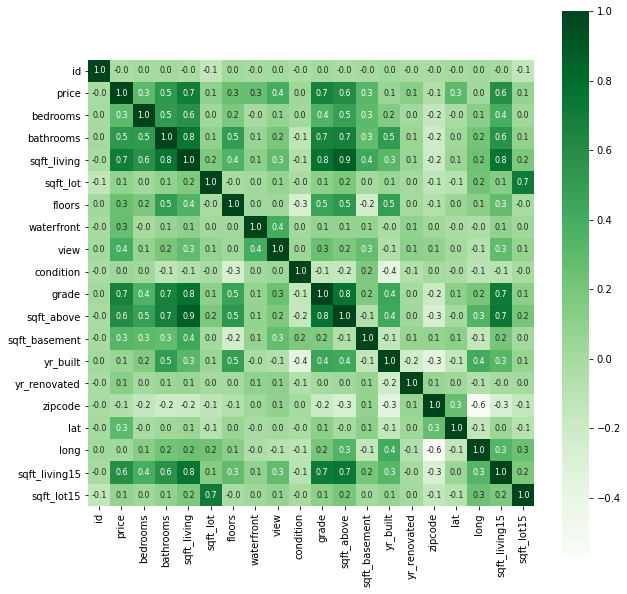

In [8]:
# Constracting a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

# Splitting the data and Target

In [9]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [10]:
print(X)
print(Y)

               id             date  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000         3       1.00         1180   
1      6414100192  20141209T000000         3       2.25         2570   
2      5631500400  20150225T000000         2       1.00          770   
3      2487200875  20141209T000000         4       3.00         1960   
4      1954400510  20150218T000000         3       2.00         1680   
...           ...              ...       ...        ...          ...   
21608   263000018  20140521T000000         3       2.50         1530   
21609  6600060120  20150223T000000         4       2.50         2310   
21610  1523300141  20140623T000000         2       0.75         1020   
21611   291310100  20150116T000000         3       2.50         1600   
21612  1523300157  20141015T000000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0           0     0          3      7 

# Splitting the data into Training and Testing sets

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(21613, 20) (17290, 20) (4323, 20)


# Model Training

In [13]:
# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# We will be using the XGBoost Regressor model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model.fit(X_train, Y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Evaluation
Prediction on training data

In [14]:
# Accuracy for prediction on training data
training_data_prediction=model.predict(X_train)
print(training_data_prediction)

[1742191.5   359190.22  690403.6  ...  985665.75  300370.94  709352.5 ]


In [15]:
# R squared error
score_1=metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error:", score_1)
print("Mean Absolute Error:", score_2)

R squared error: 0.9775982259234595
Mean Absolute Error: 38704.19813295257


Visualizing the actual prices and predicted prices

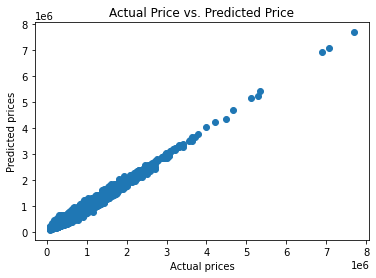

In [16]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual Price vs. Predicted Price")
plt.show()

Prediction on Test Data

In [17]:
# Accuracy for prediction on test data
test_data_prediction=model.predict(X_test)


In [18]:
# R squared error
score_1=metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error:", score_1)
print("Mean Absolute Error:", score_2)

R squared error: 0.9027398004684009
Mean Absolute Error: 63865.40898247745
